# Import all libraries

In [1]:
import librosa
import librosa.display
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

data_dir = 'C:/Users/preet/Desktop/Final year Project/audio_data1'
class_labels = ['fake', 'real']


# Extract Features from audio using mfcc

In [2]:
def extract_features(file):
    print(file)
    audio,sr=librosa.load(file)
    mfccs=librosa.feature.mfcc(y=audio,sr=sr,n_mfcc=25)
    mfcc_scaled_features=np.mean(mfccs.T,axis=0)
    return mfcc_scaled_features

# Import dataset of images from Folder

In [3]:
X = []
y = []
for label, class_name in enumerate(class_labels):
    class_dir = os.path.join(data_dir, class_name)
    for file_name in os.listdir(class_dir):
        file_path = os.path.join(class_dir, file_name)
        features = extract_features(file_path)
        X.append(features)
        y.append(label)

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2826776.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2827693.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2829043.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2831410.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2831844.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2831994.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2832394.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2832477.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2833762.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2834285.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2835020.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2835194.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2835573.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2887795.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2888081.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2888191.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2888596.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2888854.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2889881.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2890608.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2890838.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2892987.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2894007.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2894107.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2895911.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2895937.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2958095.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2958641.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2959188.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2959609.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2959991.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2961647.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2962374.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2963155.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2963628.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2963666.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2963785.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2963867.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_2964886.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3020494.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3020555.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3020621.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3021599.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3021959.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3022940.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3024431.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3025692.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3026538.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3027894.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3028894.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3030112.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3030929.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3089498.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3090557.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3090583.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3091849.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3092472.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3092700.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3092822.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3093185.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3093534.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3093801.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3094082.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3094874.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3095124.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3146067.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3146197.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3147303.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3148237.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3149229.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3149236.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3149657.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3150169.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3151881.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3151999.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3152313.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3152954.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3153050.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3218501.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3220081.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3220414.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3220706.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3220879.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3220943.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3221437.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3221717.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3221893.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3222129.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3223179.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3223559.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3223665.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3289959.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3290536.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3291825.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3292062.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3292380.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3292767.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3293511.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3294853.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3294926.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3295441.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3295650.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3295808.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3296082.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3346070.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3346384.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3346997.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3347156.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3349138.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3349453.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3353739.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3354072.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3354359.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3354392.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3355442.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3355462.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3355540.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3420026.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3420388.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3420613.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3421085.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3421161.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3421236.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3421665.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3422520.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3423188.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3423415.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3423664.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3424132.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3424616.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3475718.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3476552.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3477092.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3477714.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3477968.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3478144.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3478658.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3478947.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3479464.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3480390.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3481947.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3482541.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3484420.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3546314.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3546775.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3547583.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3549631.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3549647.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3551822.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3552234.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3552986.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3553005.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3553786.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3553967.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3554128.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3554318.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3617996.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3618116.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3618767.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3619292.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3619498.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3620195.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3620253.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3620817.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3621277.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3621540.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3621915.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3622402.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3623933.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3693927.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3694037.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3694269.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3694349.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3694508.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3695181.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3695500.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3695649.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3695889.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3696812.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3698117.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3700284.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3700291.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3762352.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3762413.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3763099.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3763171.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3763969.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3765254.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3766019.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3766418.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3767648.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3767704.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3768058.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3768134.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3768268.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3829895.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3830220.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3830921.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3831306.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3832995.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3833530.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3833623.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3833739.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3834961.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3835319.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3835778.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3835818.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3835819.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3894817.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3894830.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3895363.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3896851.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3897435.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3897907.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3898295.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3899322.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3901055.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3901273.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3901587.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3901694.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3903068.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3954480.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3955173.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3956535.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3957229.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3957900.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3958057.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3958353.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3958440.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3958741.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3960577.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3961466.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3961777.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_3962756.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4025022.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4025778.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4028437.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4028634.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4029187.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4029515.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4030113.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4030356.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4031294.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4031301.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4033177.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4033330.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4036012.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4083446.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4083902.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4084971.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4085373.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4085392.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4086016.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4086358.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4086832.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4086876.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4087294.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4087578.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4089047.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4089949.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4168975.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4169368.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4169471.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4169547.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4169964.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4170901.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4171064.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4171217.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4171487.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4172528.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4173186.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4173456.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4173790.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4223757.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4224687.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4225288.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4225333.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4225547.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4225586.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4226126.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4226263.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4226354.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4227742.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4228094.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4228834.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4229898.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4297667.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4298024.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4298361.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4300523.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4301521.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4302088.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4302465.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4302740.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4303813.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4304225.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4305238.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4305576.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4305596.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4371162.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4372021.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4372097.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4372295.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4372487.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4373476.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4374092.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4374505.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4374564.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4374847.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4374868.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4374905.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4375021.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4439058.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4439782.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4440657.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4441186.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4442369.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4442511.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4444384.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4445016.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4445043.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4445225.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4446623.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4446874.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4447429.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4506176.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4506339.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4506665.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4507888.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4508905.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4509854.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4511383.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4511424.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4511459.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4513571.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4513970.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4514090.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4514194.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4568645.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4568975.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4569757.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4570189.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4570591.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4571794.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4571962.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4572219.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4572843.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4573144.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4573944.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4575352.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4575411.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4648541.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4648882.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4648977.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4649975.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4650704.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4650858.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4651240.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4653264.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4653523.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4653718.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4653724.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4654085.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4654330.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4713977.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4714024.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4715249.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4716316.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4717036.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4718710.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4718837.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4718958.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4719007.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4719420.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4719986.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4720393.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4720854.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4775057.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4776188.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4776677.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4778443.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4779224.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4779241.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4780370.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4780389.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4782016.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4782365.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4782501.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4782717.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4784347.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4839051.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4839100.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4840046.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4841565.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4841921.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4843932.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4845159.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4845387.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4845444.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4845926.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4846035.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4846136.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4846158.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4904445.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4904641.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4905165.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4905495.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4906029.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4907373.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4907389.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4907586.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4907676.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4907991.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4908581.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4909030.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4909424.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4955878.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4956135.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4958419.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4958482.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4958797.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4958833.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4958951.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4959035.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4960294.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4961527.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4961889.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4963074.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_4963222.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5023923.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5025305.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5026406.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5026441.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5026901.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5026948.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5027993.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5028072.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5028641.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5028697.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5028708.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5030185.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5031248.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5088657.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5090531.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5090551.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5090608.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5090868.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5091510.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5091691.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5091990.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5092281.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5092533.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5093282.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5095193.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5095523.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5157134.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5157632.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5157831.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5158773.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5159304.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5159656.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5159936.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5160239.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5160671.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5161378.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5161729.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5162715.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5162779.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5216299.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5219289.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5220536.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5220582.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5221028.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5221571.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5221844.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5222618.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5223993.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5224423.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5224548.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5224590.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5225466.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5292683.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5293338.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5293658.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5294224.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5294579.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5294702.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5295121.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5295577.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5296519.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5296528.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5296920.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5297443.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5297638.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5362013.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5363458.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5363745.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5364323.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5364420.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5366271.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5366966.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5367629.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5369918.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5370437.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5372592.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5373558.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5373686.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5427296.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5427352.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5427426.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5427611.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5427830.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5427856.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5428077.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5428671.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5429318.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5429622.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5430751.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5432198.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5432278.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5485641.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5486499.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5486800.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5487218.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5487963.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5488567.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5488860.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5488938.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5490153.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5490947.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5491412.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5491435.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5492356.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5554577.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5554788.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5556334.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5556633.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5556761.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5558517.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5559396.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5559484.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5559526.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5560002.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5560341.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5561063.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5563514.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5627177.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5627497.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5629187.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5629619.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5629651.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5629796.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5629856.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5631085.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5631270.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5631323.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5631440.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5631742.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5632375.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5689945.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5690035.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5690814.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5691756.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5692078.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5692097.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5693315.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5693331.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5695216.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5696486.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5697877.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5697939.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5698354.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5754462.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5754650.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5755154.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5755628.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5756708.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5756742.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5759044.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5759815.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5760810.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5760824.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5761264.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5761733.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5762299.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5826748.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5827672.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5828342.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5828981.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5830215.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5832702.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5833095.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5834232.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5834553.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5834907.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5835325.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5835729.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5835841.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5893528.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5893651.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5894140.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5894538.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5895018.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5895172.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5896975.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5897153.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5897596.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5897910.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5898202.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5898933.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5899353.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5956543.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5957150.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5957373.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5957884.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5957995.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5958326.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5958463.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5958479.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5958767.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5959072.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5959182.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5959349.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_5959728.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6026070.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6026925.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6027288.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6028588.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6028658.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6029082.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6029194.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6029420.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6029806.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6031712.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6032328.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6032850.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6033416.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6089298.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6092523.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6093076.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6093454.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6093640.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6094200.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6094253.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6095298.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6095686.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6096018.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6096386.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6097312.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6097940.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6152637.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6152825.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6153465.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6153665.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6153721.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6153760.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6154657.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6154817.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6154971.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6155558.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6156761.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6157568.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6159310.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6215452.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6215628.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6216331.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6217265.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6217295.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6218509.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6218929.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6219279.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6222247.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6222475.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6223759.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6223774.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6223827.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6286681.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6286913.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6286932.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6287077.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6287117.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6288186.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6290294.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6290952.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6291291.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6291620.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6291695.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6291773.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6292140.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6350790.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6353632.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6353813.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6354261.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6355183.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6356896.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6357050.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6357321.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6357517.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6357526.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6358331.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6358557.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6359496.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6415971.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6416557.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6416687.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6416726.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6417123.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6417317.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6417464.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6417597.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6418011.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6418299.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6418703.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6419157.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6419449.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6484577.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6486228.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6486693.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6486723.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6486980.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6487128.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6487170.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6489536.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6489693.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6490097.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6490506.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6490598.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6490911.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6547828.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6548234.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6548276.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6550208.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6550883.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6551392.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6551713.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6551837.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6552905.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6553349.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6553532.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6553908.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6554548.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6619395.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6619467.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6620895.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6621038.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6621174.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6621286.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6621713.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6622995.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6623812.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6623821.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6624176.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6624401.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6625336.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6680787.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6681088.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6681675.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6682281.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6682623.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6683794.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6684583.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6684696.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6686979.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6687114.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6687518.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6687865.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6688749.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6751883.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6752801.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6753200.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6754279.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6754774.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6754842.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6756303.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6756915.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6757219.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6757727.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6758446.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6758674.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6759403.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6830532.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6831466.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6832953.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6834540.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6834652.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6835200.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6836398.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6836932.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6839774.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6840245.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6840556.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6840690.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6840802.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6892674.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6893250.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6895001.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6896770.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6898133.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6898383.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6899810.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6899968.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6901051.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6902681.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6902833.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6903149.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6903783.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6949266.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6949687.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6950600.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6951006.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6951638.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6952051.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6952781.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6953406.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6954032.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6954837.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6957117.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6957283.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_6958359.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7028251.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7029319.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7029392.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7029895.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7030074.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7030437.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7030836.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7030861.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7031080.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7031168.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7031306.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7031980.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7032136.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7091196.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7091676.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7091817.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7091848.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7091896.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7093402.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7093411.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7093931.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7094041.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7094589.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7094796.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7094965.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7094975.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7143938.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7145472.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7145864.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7146345.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7146876.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7147397.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7148082.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7148970.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7149179.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7149435.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7149695.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7150274.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7150708.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7206220.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7206246.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7206299.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7206772.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7207336.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7207687.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7208672.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7209965.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7210696.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7211735.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7211753.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7212013.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7212060.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7275001.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7275397.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7276589.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7277167.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7278229.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7278311.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7278509.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7278858.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7279307.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7279989.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7280401.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7281015.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7281159.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7331651.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7331654.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7331720.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7331840.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7332066.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7332763.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7333091.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7333250.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7334576.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7334607.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7335129.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7335601.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7337144.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7388723.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7388866.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7388871.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7388904.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7389015.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7389105.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7389214.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7389395.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7390072.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7390342.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7391671.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7392284.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7393671.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7455901.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7458005.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7459319.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7459422.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7459580.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7459795.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7459811.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7460094.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7460919.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7460958.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7461040.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7463107.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7464280.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7521512.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7521790.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7522206.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7522283.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7524440.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7524540.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7525010.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7525091.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7525244.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7525767.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7526416.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7526656.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7526777.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7577850.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7579323.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7579942.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7581183.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7582835.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7584030.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7584092.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7584539.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7584788.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7585893.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7586206.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7586380.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7587942.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7633224.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7635024.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7635520.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7635843.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7636473.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7638298.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7640331.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7640450.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7640908.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7641129.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7641159.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7641447.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7641817.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7694906.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7694966.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7695039.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7695226.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7695245.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7695465.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7695510.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7696325.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7697515.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7697892.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7697979.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7698637.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7698904.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7756173.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7756238.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7756409.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7756924.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7757055.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7757173.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7757696.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7757814.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7760099.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7760174.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7760227.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7760363.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7760924.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7813076.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7813544.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7815011.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7815248.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7815344.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7816003.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7816819.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7816846.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7817225.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7817451.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7819043.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7819097.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7819798.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7875523.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7876546.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7876973.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7878150.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7878211.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7878571.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7879576.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7879995.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7880514.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7880550.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7883328.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7883693.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7884286.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7946465.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7946496.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7946884.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7947630.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7947662.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7949260.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7950260.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7950517.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7951172.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7951889.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7953159.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7953471.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_7954380.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8016454.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8019844.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8020639.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8021505.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8021684.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8022000.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8023041.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8023983.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8024014.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8024735.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8024758.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8024787.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8024926.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8085552.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8085631.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8085936.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8086346.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8086419.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8086972.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8086986.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8087885.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8089145.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8090102.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8090443.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8090805.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8091647.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8138691.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8139224.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8139288.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8140249.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8140433.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8141901.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8142004.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8142236.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8142949.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8142988.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8145707.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8146012.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8146799.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8205767.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8207965.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8209765.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8211359.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8212291.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8212949.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8213309.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8213352.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8213401.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8213789.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8214339.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8214776.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8215041.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8285739.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8285840.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8286094.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8286400.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8287167.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8288109.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8288906.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8289361.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8289914.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8291086.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8293730.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8295817.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8296034.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8358680.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8358684.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8359008.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8359118.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8359738.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8360147.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8360978.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8361424.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8361609.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8362045.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8362912.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8363627.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8364154.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8423289.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8424077.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8424084.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8424157.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8424724.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8424992.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8425122.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8425128.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8425598.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8425905.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8427353.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8427416.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8428519.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8484861.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8485154.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8486100.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8486404.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8487209.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8487885.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8488579.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8488684.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8488988.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8489881.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8490994.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8491335.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8493432.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8546710.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8546971.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8548417.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8549240.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8549576.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8550381.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8550461.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8550715.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8551212.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8551569.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8552142.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8552161.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8552659.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8618273.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8618432.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8618689.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8619253.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8619361.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8619688.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8621180.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8622815.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8623253.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8623490.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8624362.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8625690.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8626728.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8689002.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8689583.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8690110.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8690666.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8691764.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8692089.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8692213.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8692960.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8693010.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8693666.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8694979.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8695222.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8695868.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8754373.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8754459.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8755311.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8755790.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8755917.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8756258.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8756602.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8756941.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8757855.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8758203.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8758498.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8758724.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8759565.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8825681.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8826150.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8826258.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8827587.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8829199.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8829741.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8829832.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8830433.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8832668.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8832719.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8833531.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8833920.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8833933.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8887385.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8887766.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8888903.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8889202.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8889390.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8890877.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8891088.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8891118.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8891133.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8891307.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8891320.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8892243.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8892386.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8959959.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8960387.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8960736.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8960763.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8960945.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8961557.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8961930.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8962012.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8962029.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8962291.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8963064.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8964132.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_8964874.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9032192.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9032929.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9037892.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9039099.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9039359.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9039631.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9040314.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9040549.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9041455.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9041573.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9042039.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9043493.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9043896.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9100251.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9100339.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9101014.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9101305.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9101923.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9102532.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9103728.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9105293.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9106136.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9106315.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9106675.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9107422.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9108542.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9162715.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9162826.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9163063.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9163648.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9163803.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9165073.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9165189.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9165269.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9165968.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9166383.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9166719.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9167526.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9168266.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9232059.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9233372.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9233512.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9233697.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9235965.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9236386.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9237242.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9238588.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9239795.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9241080.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9241622.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9241694.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9241874.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9295746.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9297479.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9297953.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9298303.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9299077.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9300215.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9300463.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9301014.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9302308.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9303374.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9303843.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9304067.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9304826.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9365119.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9365719.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9366124.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9366152.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9366202.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9366872.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9367260.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9367691.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9370304.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9370379.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9370841.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9371038.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9371188.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9433668.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9435140.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9435141.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9436033.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9436350.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9436692.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9436918.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9437172.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9437643.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9438113.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9438355.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9438704.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9438939.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9498512.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9500532.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9500981.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9500996.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9501529.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9501737.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9501828.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9502311.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9502317.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9502387.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9502718.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9503289.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9503559.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9565733.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9565989.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9566187.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9566212.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9566824.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9568077.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9568708.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9569310.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9569756.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9570497.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9571812.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9571982.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9572182.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9632383.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9633079.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9634003.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9634351.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9635044.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9635070.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9635881.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9636981.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9638401.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9638872.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9639156.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9641174.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9641619.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9701184.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9701877.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9702949.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9703394.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9704152.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9705410.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9705819.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9706008.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9707162.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9707725.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9708825.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9710399.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9710466.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9775314.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9775496.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9777735.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9778372.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9778376.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9779319.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9779729.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9779978.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9780174.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9780476.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9781452.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9782692.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9783307.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9844896.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9845352.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9845403.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9845428.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9846021.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9846233.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9846692.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9847163.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9847175.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9847737.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9848213.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9848935.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9851042.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9915922.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9916763.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9917167.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9920694.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9922697.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9923796.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9923905.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9924117.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9924204.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9925097.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9926070.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9926699.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9927649.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9982535.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9985005.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9985248.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9985507.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9985730.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9985949.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9986158.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9986371.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9987214.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9987379.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9987623.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9988164.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_D_9988500.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8043013.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8043133.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8043161.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8043186.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8043224.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8043317.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8043525.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8043978.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8043988.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8044091.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8044782.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8045179.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8045185.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8063271.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8063287.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8063495.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8063557.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8063889.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8064688.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8064700.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8064863.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8065136.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8065150.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8065303.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8065376.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8065450.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8088812.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8089108.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8089563.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8089699.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8089779.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8090410.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8090523.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8090804.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8090926.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8091023.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8091203.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8091219.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8091702.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8113204.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8113263.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8113399.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8113434.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8113685.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8114134.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8114169.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8114268.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8114325.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8114370.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8114401.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8114609.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8114625.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8135294.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8135336.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8135378.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8135781.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8136181.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8136417.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8136448.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8136522.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8136793.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8137499.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8137700.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8137795.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8137801.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8155315.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8155372.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8155883.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8155957.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8156182.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8156221.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8156228.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8156909.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8157155.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8157231.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8157940.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8157957.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8158497.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8177004.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8177122.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8177126.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8177131.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8177228.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8177298.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8177447.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8177527.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8177529.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8177837.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8177956.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8178042.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8178376.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8199648.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8200652.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8201051.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8201473.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8201711.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8201719.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8201779.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8202042.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8202112.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8202215.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8202560.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8202614.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8202624.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8225910.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8225965.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8226122.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8226815.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8226901.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8227215.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8227247.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8227311.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8227387.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8227564.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8227790.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8227977.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8228150.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8245956.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8246008.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8246107.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8246259.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8246283.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8246338.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8246674.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8246744.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8247154.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8247628.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8247636.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8247864.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8248003.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8265783.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8265795.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8265904.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8266571.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8266912.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8266929.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8267044.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8267404.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8267570.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8268032.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8268310.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8268328.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8268436.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8287510.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8287729.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8287780.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8287852.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8288339.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8288791.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8288870.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8289113.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8289218.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8289395.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8289833.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8289864.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8289960.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8310367.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8310484.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8310843.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8310876.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8311666.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8312118.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8312127.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8312288.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8312476.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8312490.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8312778.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8313069.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8313485.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8334597.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8334690.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8334929.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8335127.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8335245.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8335675.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8335716.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8335769.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8335879.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8336452.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8336530.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8336587.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8336783.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8353702.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8353957.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8354053.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8354057.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8354176.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8355014.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8355070.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8355467.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8355478.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8356060.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8356131.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8356140.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8356476.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8375621.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8375836.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8376772.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8376811.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8376985.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8377066.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8377197.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8377295.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8377817.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8377900.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8378151.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8378271.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8378710.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8395817.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8395975.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8396309.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8396540.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8396652.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8396901.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8396997.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8398042.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8398353.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8398583.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8398739.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8399756.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8400283.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8421179.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8421659.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8421927.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8422274.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8422446.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8422484.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8422964.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8422996.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8423941.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8424299.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8424331.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8424407.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8424506.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8446766.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8446780.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8446790.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8446929.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8447108.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8447165.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8447249.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8447454.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8447482.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8447767.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8448121.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8448190.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8448574.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8468369.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8468825.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8469141.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8469145.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8469160.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8469260.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8469323.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8469447.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8469565.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8469633.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8469925.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8470181.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8470493.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8490129.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8490395.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8490415.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8490772.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8491013.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8491036.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8491169.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8491464.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8492343.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8492580.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8492602.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8492681.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8493023.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8515193.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8515331.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8515478.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8515533.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8515912.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8516126.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8516237.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8516438.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8516630.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8516801.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8517030.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8517830.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8517864.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8535257.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8535679.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8535781.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8535825.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8535826.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8536862.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8537555.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8537593.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8538103.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8538268.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8538416.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8538832.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8538851.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8558166.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8558349.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8558412.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8558816.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8558883.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8559372.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8559452.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8559496.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8559542.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8559775.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8560070.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8560668.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8560863.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8583315.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8583467.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8583878.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8583946.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8583968.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8584052.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8584177.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8584178.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8584516.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8584520.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8584544.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8584570.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8584763.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8605057.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8605850.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8606696.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8606833.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8607046.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8607091.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8607494.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8607648.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8607833.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8607964.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8608018.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8608201.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8608233.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8627786.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8627990.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8628823.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8629120.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8629128.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8629507.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8629604.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8629736.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8629823.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8629926.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8629942.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8629975.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8630287.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8649443.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8649465.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8649779.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8649971.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8650135.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8650227.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8650808.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8650894.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8651038.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8651316.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8651345.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8651685.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8652084.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8669035.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8669357.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8670076.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8670277.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8670278.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8670614.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8670800.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8671688.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8671728.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8671763.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8672055.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8672126.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8672158.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8692599.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8692637.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8692961.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8693036.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8693519.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8693552.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8693584.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8693775.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8694099.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8694304.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8695226.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8695398.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8695694.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8716815.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8716827.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8716923.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8717015.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8717557.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8717617.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8717651.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8717912.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8717917.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8718045.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8718231.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8718354.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8718721.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8737558.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8737617.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8737756.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8737870.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8737976.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8738050.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8738088.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8738388.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8738559.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8738565.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8738661.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8738730.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8738755.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8756704.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8756746.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8757163.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8757243.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8757367.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8758345.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8758360.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8758397.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8758582.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8758587.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8759035.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8759065.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8759342.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8778256.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8778337.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8778345.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8778668.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8778697.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8778873.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8778923.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8779496.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8779583.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8779705.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8779981.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8780087.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8780380.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8801343.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8801740.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8801991.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8802306.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8802309.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8802350.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8802601.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8802969.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8803058.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8803203.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8803342.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8803824.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8803951.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8823563.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8823684.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8823805.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8823818.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8824035.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8824187.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8825224.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8825448.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8825450.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8825757.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8825814.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8825972.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8826103.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8846202.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8846662.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8846737.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8846959.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8846992.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8847034.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8847167.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8847236.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8847338.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8847340.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8847720.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8847733.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8847796.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8870097.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8870408.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8870539.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8870553.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8870901.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8871135.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8871324.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8871380.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8871577.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8871882.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8872130.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8872139.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8872604.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8890363.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8890678.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8891507.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8891664.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8891671.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8891727.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8892125.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8892155.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8892383.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8892806.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8892843.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8893006.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8893178.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8914043.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8914217.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8914355.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8914402.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8914547.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8914622.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8914933.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8915405.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8915439.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8915447.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8915520.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8915706.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8915909.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8935413.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8935651.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8935693.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8935800.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8935920.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8935983.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8936027.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8936109.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8936249.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8936299.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8936435.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8936522.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8936530.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8959839.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8960027.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8960297.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8960339.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8960761.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8961027.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8961081.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8961296.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8961675.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8961726.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8962142.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8962220.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8962661.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8985880.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8986016.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8986098.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8986192.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8986275.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8986486.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8986660.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8986771.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8986845.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8987127.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8987402.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8987463.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_8987721.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9009831.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9009890.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9010042.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9010167.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9010594.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9011072.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9011123.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9011278.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9011524.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9011614.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9012056.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9012142.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9012220.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9031486.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9031652.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9031762.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9031863.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9031912.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9032208.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9032289.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9032294.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9032400.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9032690.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9033039.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9033211.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9033329.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9051360.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9051386.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9051697.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9051925.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9052097.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9052128.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9052456.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9052510.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9052572.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9052594.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9052719.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9052826.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9053080.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9072159.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9072660.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9073394.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9073453.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9073773.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9074146.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9074148.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9074165.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9074206.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9074693.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9074803.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9074840.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9074933.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9093328.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9093348.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9093441.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9093554.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9093937.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9094141.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9094163.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9094268.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9094311.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9094395.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9094802.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9094929.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9095068.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9114739.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9115613.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9116424.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9116583.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9116782.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9116952.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9116983.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9117013.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9117104.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9117395.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9117436.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9117535.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9117626.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9138225.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9138488.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9138707.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9138898.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9138928.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9138938.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9139184.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9139269.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9139572.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9139578.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9139633.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9139644.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9139855.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9159011.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9159041.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9159091.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9159289.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9159290.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9159551.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9159844.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9160512.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9161326.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9161744.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9161870.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9162493.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9162561.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9183251.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9183400.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9183436.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9183545.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9183679.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9183709.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9183774.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9183862.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9184232.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9184316.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9184609.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9184768.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9184826.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9207914.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9208512.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9208628.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9208826.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9209150.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9209202.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9209393.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9209678.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9209750.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9209778.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9209859.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9209987.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9210005.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9228053.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9228154.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9228384.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9228490.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9228992.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9229248.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9229637.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9229983.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9230097.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9230127.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9230134.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9230364.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9230617.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9252185.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9253066.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9253194.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9253261.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9253387.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9253407.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9253638.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9253668.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9253729.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9253751.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9253769.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9253893.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9254660.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9274207.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9274422.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9274919.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9275019.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9275020.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9275716.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9275926.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9275967.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9276097.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9276329.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9276334.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9276352.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9276800.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9295747.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9295754.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9295964.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9296111.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9296794.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9296996.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9297031.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9297265.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9297345.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9297349.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9297648.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9298421.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9298677.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9318664.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9318798.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9318874.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9319113.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9319164.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9319327.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9319377.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9319938.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9320153.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9320267.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9320664.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9320727.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9320880.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9341458.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9341638.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9341674.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9342092.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9342649.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9342873.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9343191.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9343694.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9344009.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9344017.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9344031.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9344176.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9344206.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9363903.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9364120.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9364465.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9364648.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9364797.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9364987.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9365015.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9365283.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9365291.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9365292.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9365518.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9365717.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9365758.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9385668.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9386096.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9386658.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9386833.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9386897.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9387014.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9387181.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9387352.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9387725.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9388082.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9388221.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9388614.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9388786.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9406955.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9406980.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9407055.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9407351.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9407727.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9407759.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9408035.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9408088.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9408549.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9409303.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9410051.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9410474.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9410515.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9428954.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9428965.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9429187.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9429436.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9429629.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9430094.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9430309.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9430578.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9431208.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9431255.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9431278.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9433204.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9433283.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9450103.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9450212.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9450329.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9450723.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9450771.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9452209.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9452366.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9452505.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9452579.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9452672.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9452673.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9452794.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9452810.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9472636.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9472752.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9473089.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9473102.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9473218.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9473399.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9473460.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9473683.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9474108.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9474139.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9474269.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9474288.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9474301.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9491514.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9491525.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9492088.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9492175.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9493311.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9493318.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9493544.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9493821.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9493956.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9493994.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9494533.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9495064.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9495118.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9512753.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9512834.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9512871.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9512959.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9512991.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9513281.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9513340.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9513566.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9513593.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9513615.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9514045.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9514096.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9514249.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9538925.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9539212.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9539438.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9539611.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9539654.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9539752.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9539811.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9540415.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9540541.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9540651.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9540678.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9540785.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9540837.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9559202.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9559215.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9559310.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9559636.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9559708.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9559757.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9559863.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9560066.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9560186.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9560289.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9560321.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9560803.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9560932.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9578602.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9578672.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9578902.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9579470.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9579683.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9580036.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9580062.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9580184.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9580527.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9580615.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9580695.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9580954.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9581053.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9604715.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9604968.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9605288.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9605348.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9605375.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9605546.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9605633.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9606401.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9606482.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9606738.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9607187.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9607374.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9607810.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9630652.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9630686.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9630800.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9631170.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9631382.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9631461.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9631803.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9632174.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9632262.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9633031.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9633465.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9633924.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9634156.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9654307.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9654373.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9654663.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9655204.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9655436.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9655611.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9655762.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9655987.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9656103.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9656631.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9656857.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9656908.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9657155.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9674652.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9674654.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9674896.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9675066.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9675165.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9675836.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9675867.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9675872.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9676001.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9676003.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9676175.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9676355.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9676482.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9694094.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9694198.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9694301.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9694504.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9694661.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9694731.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9694819.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9695024.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9695340.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9695766.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9695829.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9695853.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9696309.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9715965.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9716040.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9716077.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9716115.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9716300.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9716441.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9716555.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9716628.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9717210.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9717842.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9718447.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9718535.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9718548.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9737254.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9737357.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9737906.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9738066.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9738453.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9738610.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9738621.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9738732.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9739010.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9739123.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9739277.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9740214.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9740556.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9764205.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9764349.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9764466.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9764486.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9764737.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9764772.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9764820.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9764884.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9764983.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9765058.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9765088.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9765162.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9766032.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9786774.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9787230.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9787716.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9787720.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9788218.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9788831.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9789134.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9789220.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9789264.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9789320.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9789349.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9789519.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9789730.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9816102.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9816270.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9816272.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9816276.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9816568.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9816673.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9816956.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9817031.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9817126.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9817776.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9817821.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9818026.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9818033.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9839765.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9840240.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9840515.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9840570.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9841129.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9841242.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9841243.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9841358.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9841409.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9841434.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9841444.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9841468.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9841867.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9860813.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9861027.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9861583.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9861603.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9861662.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9861695.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9862399.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9862485.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9862516.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9862567.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9862650.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9862958.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9863369.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9883267.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9883324.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9883339.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9883712.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9883897.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9884043.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9884178.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9884274.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9884331.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9884371.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9884402.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9884605.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9884789.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9904440.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9904611.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9904621.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9904826.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9904875.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9904923.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9904995.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9905142.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9905159.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9905312.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9905414.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9905534.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9905720.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9926470.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9926658.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9926796.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9927049.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9927228.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9927245.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9927452.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9927572.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9927919.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9927991.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9928092.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9928223.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9928530.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9949534.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9949537.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9949748.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9950198.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9950210.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9950415.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9950793.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9950890.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9951536.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9951740.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9952174.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9952415.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9952459.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9972487.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9972637.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9972952.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9973008.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9973228.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9973864.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9974975.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9975165.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9975450.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9975531.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9975622.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9975780.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9975944.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9995409.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9995425.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9996113.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9996724.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9997171.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9997534.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9997664.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9997847.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9998245.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9998633.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9998825.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9998856.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_E_9998952.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4360190.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4360864.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4361622.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4362396.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4362634.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4362938.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4363089.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4364091.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4364137.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4365767.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4366653.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4366962.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4367469.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4406747.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4407728.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4408264.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4408459.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4408471.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4408598.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4408765.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4408791.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4408856.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4409808.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4409929.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4410160.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4410198.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4450297.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4451349.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4451452.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4451627.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4452112.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4452626.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4453976.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4454054.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4454105.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4454180.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4454493.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4454494.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4454858.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4490794.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4491150.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4491630.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4491683.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4492095.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4492237.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4492461.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4492705.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4493236.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4493241.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4493789.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4494210.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4494659.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4535882.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4535962.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4536012.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4536060.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4536770.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4537094.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4537416.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4538383.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4538655.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4539661.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4539906.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4540367.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4540403.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4583383.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4583387.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4583580.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4583819.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4584407.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4584857.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4584882.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4585301.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4585331.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4585475.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4585479.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4585739.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4587236.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4622429.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4622476.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4623143.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4623283.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4623430.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4624695.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4625463.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4625554.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4625640.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4626344.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4626416.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4626978.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4627481.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4667937.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4668130.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4668475.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4669717.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4670537.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4671878.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4672172.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4672286.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4672863.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4672943.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4673291.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4673617.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4674592.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4713072.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4713729.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4713826.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4714179.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4714251.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4714619.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4715226.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4716584.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4716810.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4716847.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4717070.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4718256.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4718263.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4762119.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4763016.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4763502.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4763730.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4763852.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4765217.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4766453.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4767031.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4767137.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4767849.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4767881.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4767966.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4768074.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4805738.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4806223.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4806342.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4806510.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4806532.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4806734.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4807050.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4807248.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4807300.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4808026.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4808367.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4808604.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4809185.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4848589.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4849089.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4849758.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4849959.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4850187.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4850254.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4851295.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4851500.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4851696.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4852082.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4852365.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4852642.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4853814.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4893109.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4893268.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4893773.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4894235.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4894239.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4894282.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4894341.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4894763.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4894778.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4894949.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4895261.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4895313.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4895439.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4928906.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4929374.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4929504.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4929943.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4930251.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4930523.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4930539.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4930844.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4930945.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4932264.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4932406.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4933153.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4933647.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4974273.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4974553.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4974655.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4975092.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4975139.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4975188.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4975437.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4976490.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4977330.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4978069.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4978153.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4978207.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_4978465.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5018353.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5018986.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5019086.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5019111.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5019152.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5019321.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5019792.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5019800.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5020332.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5020505.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5020979.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5021134.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5021176.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5052303.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5053542.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5054060.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5054337.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5055108.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5055455.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5056244.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5056503.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5056731.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5056733.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5056980.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5057814.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5058538.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5102173.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5102915.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5103030.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5103309.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5103355.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5103794.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5103920.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5104306.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5105048.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5105058.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5105194.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5105792.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5105937.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5146825.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5147063.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5147844.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5148309.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5148810.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5148970.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5149856.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5149892.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5150268.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5151815.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5152160.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5152523.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5152732.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5195897.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5195970.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5196549.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5196913.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5196998.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5197294.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5197826.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5198922.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5199698.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5200266.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5200458.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5200490.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5200634.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5232818.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5232973.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5233390.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5233832.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5233935.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5234515.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5234980.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5235172.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5235647.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5236269.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5236500.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5236832.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5236931.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5271335.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5271380.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5271516.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5271583.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5271813.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5272036.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5272490.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5272813.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5274129.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5275097.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5276031.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5276851.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5277165.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5322311.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5322410.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5322532.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5323303.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5323389.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5323763.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5323770.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5324142.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5324810.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5325199.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5325436.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5325495.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5325513.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5359252.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5359544.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5359573.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5360018.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5360020.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5360531.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5361239.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5361430.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5361438.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5361775.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5362138.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5362383.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5362543.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5404051.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5404386.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5404755.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5404931.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5405321.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5405540.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5405802.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5406772.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5406784.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5407130.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5407294.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5407483.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5407648.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5438319.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5438923.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5438934.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5438935.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5438984.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5439165.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5439250.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5439297.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5440056.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5441710.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5441739.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5441985.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5442292.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5482669.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5484381.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5484845.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5484856.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5484945.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5484991.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5485604.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5486913.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5486930.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5486978.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5487727.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5487815.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5488749.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5532206.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5532635.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5533077.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5533754.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5533835.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5534268.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5534567.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5536325.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5536405.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5537857.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5538735.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5539334.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5539475.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5575751.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5578087.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5578425.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5578720.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5578957.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5579001.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5579539.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5579799.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5580502.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5581180.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5582595.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5583136.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5583452.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5622338.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5622745.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5623024.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5623137.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5623243.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5623355.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5623910.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5624291.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5624334.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5624761.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5625223.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5625532.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5625564.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5666430.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5666983.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5667211.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5668280.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5668487.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5669303.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5670341.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5670565.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5671026.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5671374.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5671657.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5671782.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5672063.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5715316.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5715713.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5715817.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5716591.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5716822.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5717019.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5717414.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5717492.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5717728.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5717905.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5718643.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5718759.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5718775.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5757396.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5757450.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5757508.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5758331.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5758668.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5758696.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5759043.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5759321.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5759517.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5759553.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5759683.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5759737.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5760051.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5807938.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5808527.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5808720.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5808768.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5809373.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5809568.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5809798.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5810580.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5810911.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5810979.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5811730.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5811814.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5811997.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5849428.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5849512.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5850191.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5850475.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5850667.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5850978.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5851378.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5851974.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5852033.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5852856.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5852962.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5853791.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5854193.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5891766.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5892025.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5892044.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5892277.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5892643.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5894355.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5894607.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5895580.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5895671.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5895767.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5896697.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5896877.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5896901.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5946204.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5947008.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5947488.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5947962.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5949549.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5949672.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5949876.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5950052.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5950066.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5951351.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5951648.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5951735.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_5954172.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6002793.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6002938.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6003134.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6003567.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6004246.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6004283.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6004292.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6004773.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6004886.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6005553.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6006243.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6006381.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6006816.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6050283.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6050977.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6051217.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6051577.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6051602.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6051675.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6051680.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6051846.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6052001.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6052214.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6052738.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6053499.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6053949.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6091893.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6092020.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6092068.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6092122.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6092552.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6093318.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6093581.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6094233.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6094297.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6094680.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6094783.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6094845.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6095323.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6132697.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6133412.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6133474.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6134016.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6134276.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6134992.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6135108.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6135511.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6135685.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6136023.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6136097.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6136391.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6136637.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6174955.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6175292.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6175567.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6176303.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6176383.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6176756.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6176924.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6178146.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6178361.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6178967.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6179470.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6179582.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6179785.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6226396.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6228044.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6228773.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6230214.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6230248.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6230759.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6231503.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6231663.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6231763.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6231800.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6232315.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6232825.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6232902.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6271464.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6272009.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6272015.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6272414.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6272492.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6272759.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6272867.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6272899.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6273125.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6273906.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6274688.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6275145.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6275626.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6314957.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6315290.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6315674.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6316079.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6316180.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6316539.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6316604.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6316929.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6317812.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6318342.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6318372.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6319252.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6319269.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6356488.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6356535.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6356765.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6357079.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6358911.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6359473.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6359817.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6360208.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6360453.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6360487.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6361457.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6362362.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6363367.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6398563.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6398722.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6399854.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6399927.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6400177.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6400328.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6400605.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6401463.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6401713.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6401870.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6401991.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6402014.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6402250.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6440722.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6440741.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6440960.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6441648.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6441809.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6441852.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6442728.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6442829.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6442831.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6443780.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6443987.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6444035.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6444700.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6491479.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6491833.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6492127.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6493260.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6493306.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6493474.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6493893.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6494050.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6494354.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6494414.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6496430.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6496886.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6497447.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6530577.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6531165.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6531309.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6532044.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6532070.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6532888.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6533168.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6533551.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6534601.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6534698.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6534745.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6535348.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6535359.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6571743.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6571989.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6573078.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6573372.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6573413.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6574090.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6575418.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6576205.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6576476.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6576529.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6576923.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6577092.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6577656.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6614237.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6614337.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6614820.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6615138.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6617227.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6617744.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6617822.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6618256.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6618711.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6618797.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6619293.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6619744.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6620043.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6656815.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6657250.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6657564.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6657568.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6657623.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6659831.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6660368.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6660459.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6660840.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6661321.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6661397.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6661974.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6662313.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6702083.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6702279.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6702446.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6702634.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6702707.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6702886.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6703047.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6703105.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6703383.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6704104.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6704257.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6704890.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6704957.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6747076.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6747527.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6747901.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6747996.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6749249.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6749461.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6750168.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6750279.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6750424.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6750868.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6750928.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6751029.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6751630.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6788308.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6788574.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6790169.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6790280.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6790729.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6791822.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6792161.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6792321.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6792754.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6794021.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6794967.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6795061.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6795224.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6834916.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6834976.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6836355.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6837574.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6837643.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6837956.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6838056.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6838120.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6838169.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6838294.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6838314.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6838359.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6838433.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6877562.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6877577.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6877580.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6877935.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6878620.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6878999.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6879348.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6879992.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6880003.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6880431.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6880499.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6880656.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6881453.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6918895.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6919433.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6919617.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6919746.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6919972.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6920323.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6920473.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6920693.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6920812.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6921964.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6922067.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6924283.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6924350.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6963304.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6963768.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6964046.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6965296.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6966137.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6966144.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6966678.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6966911.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6966944.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6967089.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6967154.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6967180.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_6967255.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7002090.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7002651.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7002752.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7002983.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7003111.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7003380.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7003447.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7003653.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7003825.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7004632.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7004711.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7004939.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7005100.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7041808.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7042047.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7042444.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7043450.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7043826.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7043940.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7044222.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7044317.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7044392.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7044634.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7044899.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7045399.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7045671.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7082438.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7082730.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7082975.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7083107.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7083312.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7083501.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7083555.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7083911.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7084441.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7084517.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7085156.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7085338.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7085483.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7122952.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7123183.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7123195.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7123978.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7124444.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7124621.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7125007.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7125390.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7125464.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7125717.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7126178.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7126296.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7126306.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7160292.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7160489.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7160568.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7161107.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7161315.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7163285.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7163495.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7163514.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7164141.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7164144.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7164354.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7164360.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7164414.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7200312.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7200536.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7200699.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7200749.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7200816.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7201189.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7201700.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7201853.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7201904.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7201948.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7202283.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7202453.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7202493.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7240182.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7240764.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7240875.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7240934.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7241042.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7241171.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7241491.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7241533.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7242347.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7243296.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7243556.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7243891.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7244025.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7283008.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7283063.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7284131.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7284327.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7284590.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7285185.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7285235.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7286825.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7287177.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7287182.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7287229.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7287455.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7287749.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7331402.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7331593.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7332021.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7332190.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7332705.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7333217.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7333304.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7333828.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7334258.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7334451.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7334579.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7334637.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7334730.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7372428.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7373515.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7374598.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7374658.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7375417.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7375618.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7375701.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7375751.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7376564.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7376986.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7377106.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7377587.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7378120.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7412212.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7412444.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7412677.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7412951.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7413461.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7413844.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7414008.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7414944.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7415186.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7415463.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7415520.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7415606.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7416736.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7449353.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7449550.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7449981.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7451017.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7451033.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7451839.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7451856.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7452238.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7453626.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7454115.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7454208.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7454443.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7454683.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7498871.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7499092.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7499141.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7499684.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7499767.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7500490.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7500875.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7502110.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7502658.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7502829.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7503107.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7503409.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7503824.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7539718.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7539975.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7540124.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7540200.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7540897.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7541433.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7542066.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7542186.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7543177.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7543228.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7544009.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7545248.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7545399.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7582694.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7583187.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7583235.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7584341.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7584394.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7584696.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7585341.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7585688.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7587011.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7587186.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7587792.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7587842.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7588050.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7624762.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7625103.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7625273.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7625857.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7626810.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7627032.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7627831.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7627889.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7628015.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7628131.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7628669.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7628906.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7629060.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7670531.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7671286.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7671940.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7672005.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7672686.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7674860.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7675012.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7675303.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7675727.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7675884.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7675934.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7675969.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7676105.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7713842.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7714286.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7714430.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7714556.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7714692.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7714790.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7714858.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7715241.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7715421.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7715472.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7715820.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7716192.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7716483.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7754596.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7754797.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7755405.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7755568.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7756728.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7757604.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7757981.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7758333.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7758545.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7759567.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7760177.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7760425.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7760505.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7798825.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7798887.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7798947.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7799760.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7800300.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7800858.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7801382.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7801663.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7802358.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7802899.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7803296.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7803420.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7804199.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7846560.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7846935.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7847184.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7847379.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7847437.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7848089.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7848787.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7849136.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7849231.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7849299.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7849844.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7849882.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7850037.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7886063.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7886484.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7887927.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7888181.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7888538.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7888737.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7888797.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7889272.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7889291.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7889612.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7889627.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7890184.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7890274.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7919634.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7919712.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7920172.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7920489.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7920679.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7920807.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7920982.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7921818.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7921892.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7922537.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7922991.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7923114.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7923121.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7966412.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7967281.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7968404.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7968741.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7969450.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7969524.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7970010.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7970057.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7970267.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7970683.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7970752.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7970842.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_7972235.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8008593.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8008627.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8008696.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8008789.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8009291.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8009897.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8010120.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8010580.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8011329.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8012878.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8013182.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8013221.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8013438.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8055223.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8055426.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8055534.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8055811.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8056910.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8057116.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8057562.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8057574.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8058101.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8058987.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8059404.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8059710.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8059750.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8095132.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8095518.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8095615.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8095841.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8096070.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8096488.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8097430.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8098268.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8098525.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8098751.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8100133.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8100272.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8100382.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8140615.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8140903.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8141826.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8141852.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8142073.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8144263.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8145110.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8145727.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8145904.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8146127.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8148012.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8148434.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8148691.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8185499.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8185768.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8186588.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8186635.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8188113.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8188211.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8189307.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8189555.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8189595.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8189612.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8190246.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8190330.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8190614.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8230550.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8230648.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8230948.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8231122.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8231895.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8232075.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8232743.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8232914.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8233141.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8233382.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8233824.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8234099.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8234479.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8275053.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8275268.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8275483.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8276238.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8276326.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8276471.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8276528.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8277230.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8277579.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8277793.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8277795.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8278096.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8278483.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8318359.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8318372.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8318405.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8318685.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8319011.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8319280.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8319786.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8320393.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8320925.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8321106.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8322587.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8322608.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8322687.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8358368.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8358392.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8359382.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8359685.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8359715.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8359898.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8360152.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8360945.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8361331.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8361423.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8361585.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8361658.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8361696.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8401578.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8401626.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8402028.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8402523.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8402841.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8402848.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8403252.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8404098.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8404115.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8404339.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8404615.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8404759.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8404814.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8444829.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8445541.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8446252.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8446324.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8446673.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8446769.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8446875.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8447020.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8447094.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8447252.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8447257.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8447428.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8448876.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8488533.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8489429.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8490324.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8491052.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8491117.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8491412.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8491528.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8491606.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8492533.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8492730.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8492758.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8492924.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8494154.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8526488.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8527084.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8527420.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8527510.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8528119.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8528312.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8528859.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8529370.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8529430.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8529509.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8529560.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8529612.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8530022.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8569223.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8569755.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8569900.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8570091.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8570199.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8570339.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8570356.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8570572.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8570998.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8571110.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8571166.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8571943.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8572043.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8612859.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8613392.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8613529.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8613802.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8614786.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8615204.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8615573.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8615979.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8616086.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8617050.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8617227.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8617496.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8617525.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8663024.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8663614.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8664283.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8664415.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8664687.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8664714.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8664950.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8665590.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8665906.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8666258.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8667111.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8667183.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8667352.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8707664.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8708011.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8708677.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8709266.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8710628.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8711433.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8711564.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8711939.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8712204.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8712859.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8713799.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8713805.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8715597.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8757076.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8757513.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8757615.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8758621.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8760647.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8760909.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8761635.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8762295.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8762347.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8763735.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8764460.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8764750.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8764915.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8803347.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8803658.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8803913.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8803962.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8804300.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8804689.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8804745.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8805379.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8805503.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8805612.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8805825.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8805873.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8806015.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8838550.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8838551.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8838788.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8838945.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8839278.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8839523.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8839591.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8839871.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8839890.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8840423.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8841326.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8841351.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8841576.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8882893.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8883143.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8883478.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8883534.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8883712.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8884121.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8885501.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8885763.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8886715.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8887296.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8887300.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8887730.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8888346.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8929699.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8929764.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8930212.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8931202.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8931996.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8932019.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8932031.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8932051.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8932562.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8933044.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8934110.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8934424.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8934729.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8970970.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8971570.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8971735.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8973012.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8973271.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8973716.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8974048.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8974886.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8974950.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8975050.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8975121.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8975236.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_8975427.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9014112.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9014113.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9014205.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9014339.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9015015.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9015279.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9015976.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9017148.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9017192.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9018445.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9018490.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9018502.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9018595.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9063687.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9064352.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9064621.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9066615.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9066681.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9067070.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9067473.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9067537.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9068454.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9069428.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9070031.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9070103.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9070193.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9111575.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9111594.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9111937.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9112513.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9112879.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9113935.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9114012.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9114515.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9114809.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9115744.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9115826.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9116239.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9116502.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9159303.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9159374.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9159553.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9159611.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9160088.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9160793.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9161324.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9161422.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9161713.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9161919.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9161981.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9162208.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9162848.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9210982.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9210984.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9212895.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9213192.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9213390.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9214535.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9214778.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9215136.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9215680.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9215956.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9215988.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9216454.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9216736.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9256704.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9259404.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9259461.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9260301.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9260381.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9260725.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9260790.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9261684.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9263115.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9263335.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9264208.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9264573.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9264723.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9303316.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9303851.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9304117.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9304322.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9304387.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9304398.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9304493.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9304743.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9305906.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9306290.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9307144.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9307485.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9307706.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9342842.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9343009.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9343538.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9344596.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9345083.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9345175.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9345319.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9345361.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9345362.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9346718.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9347365.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9347857.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9347890.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9385629.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9385746.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9385974.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9385996.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9386758.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9387036.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9388148.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9388368.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9388893.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9388922.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9389051.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9389265.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9389314.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9425525.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9425577.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9425622.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9425816.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9425888.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9426623.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9426918.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9427408.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9427923.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9428272.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9428329.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9428337.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9428542.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9477035.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9477262.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9477698.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9477910.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9478541.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9478606.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9478761.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9479439.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9479986.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9480372.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9480596.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9481343.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9481978.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9526719.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9526875.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9526985.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9527528.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9527593.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9527682.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9527980.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9527989.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9528156.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9528689.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9528925.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9529068.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9529182.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9571997.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9572003.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9572364.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9573761.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9573848.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9574242.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9574610.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9574914.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9575341.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9576339.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9576460.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9576582.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9576780.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9615866.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9616314.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9616520.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9617536.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9617848.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9617995.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9618093.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9619377.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9619389.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9619913.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9621562.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9622939.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9622954.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9661200.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9661775.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9662143.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9663112.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9663413.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9663428.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9664128.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9664601.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9665189.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9665276.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9665310.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9665519.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9665650.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9709654.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9709768.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9710071.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9710386.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9711181.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9712136.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9712408.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9712835.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9713191.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9713482.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9714889.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9715246.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9715821.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9762890.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9763097.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9763366.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9763437.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9763462.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9763770.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9765368.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9766284.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9766863.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9767513.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9767560.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9768167.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9768207.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9807216.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9808738.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9809526.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9809772.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9810035.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9810196.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9810335.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9810384.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9810479.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9810633.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9812275.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9812437.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9812553.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9848474.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9848809.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9849039.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9849084.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9849086.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9850135.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9850386.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9850423.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9850459.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9850859.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9850866.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9851170.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9851708.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9892078.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9892663.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9892820.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9892895.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9893966.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9894758.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9896517.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9897005.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9897050.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9897496.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9897744.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9898246.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9899153.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9939671.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9939780.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9940031.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9940420.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9940524.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9941132.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9942269.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9942434.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9944031.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9944104.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9944298.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9944849.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9945032.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9984137.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9984385.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9984810.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9984936.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9984948.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9985674.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9986038.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9986348.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9986633.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9987652.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9987676.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9987715.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\fake\LA_T_9987731.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1245000.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1245754.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1246607.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1249064.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1253089.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1258927.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1264788.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1273183.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1274098.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1275044.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1279882.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1281950.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1288217.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1590530.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1592094.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1592884.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1594317.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1595036.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1597752.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1607104.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1608630.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1614129.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1618135.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1624385.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1637250.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1640497.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1975696.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1975885.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1980534.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1982159.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1983415.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1984995.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1988752.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1993949.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_1997529.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2002365.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2004845.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2005171.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2009007.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2423683.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2425839.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2435925.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2436364.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2441943.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2445554.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2448116.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2450199.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2452544.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2455027.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2455736.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2459993.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2462521.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2902957.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2905424.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2906873.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2910448.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2916024.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2923426.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2924504.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2927307.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2928658.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2932112.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2934981.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2936796.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_2943260.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3291602.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3299949.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3306187.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3312475.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3315214.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3315698.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3316221.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3316993.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3317945.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3319482.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3323539.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3327924.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3329060.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3655500.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3668484.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3669578.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3678841.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3686487.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3691360.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3694891.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3698358.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3703286.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3706083.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3713783.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3714679.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_3717777.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4063304.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4072040.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4076814.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4080403.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4082470.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4083478.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4095293.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4101216.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4106360.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4107345.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4114029.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4123677.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4124707.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4463495.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4466001.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4466532.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4468016.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4469053.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4475626.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4479461.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4485182.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4489969.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4492847.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4494387.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4494554.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4500243.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4876634.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4877516.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4878438.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4881390.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4882695.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4890059.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4894198.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4896049.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4897076.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4900801.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4903304.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4917895.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_4918840.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5256804.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5260084.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5261984.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5262821.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5266850.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5267249.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5273164.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5278285.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5292101.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5293101.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5296393.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5312350.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5312607.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5676289.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5676897.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5677972.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5679718.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5684697.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5691072.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5695691.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5696762.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5698379.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5700038.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5701193.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5704754.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_5712579.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6038297.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6042898.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6043078.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6043277.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6043519.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6046406.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6055606.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6056778.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6059653.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6064218.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6066874.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6067380.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6067855.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6380295.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6382055.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6386877.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6388357.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6391787.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6393255.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6397937.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6398436.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6401877.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6402048.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6404877.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6410181.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6415819.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6701963.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6704472.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6710190.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6710328.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6711434.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6716159.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6716648.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6717375.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6718237.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6724166.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6725470.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6728141.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_6730053.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7109981.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7110669.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7114977.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7122184.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7123406.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7127063.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7130070.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7130250.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7130987.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7139553.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7140023.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7143144.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7148063.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7463826.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7464682.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7467158.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7467696.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7471560.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7473191.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7473394.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7480903.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7484152.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7485630.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7494873.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7495927.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7496196.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7790850.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7793148.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7796753.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7798955.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7812459.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7813228.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7820018.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7822260.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7830144.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7836916.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7841911.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7861052.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_7866849.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8184939.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8187537.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8187801.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8190929.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8192047.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8194315.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8197154.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8197621.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8199784.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8210054.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8210164.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8213223.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8214303.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8572375.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8577756.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8582039.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8587105.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8591419.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8591429.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8592900.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8594051.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8596053.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8596240.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8600039.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8620622.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8621322.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8976620.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8978448.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8978560.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8980393.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8982290.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8986360.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8988223.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8988565.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8988945.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8989585.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8991834.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8993681.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_8995264.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9357270.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9359637.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9366582.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9374684.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9375342.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9382979.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9385770.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9386152.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9386892.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9406266.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9408059.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9408142.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9417900.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9814046.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9818781.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9820905.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9821908.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9822511.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9829008.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9830094.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9834938.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9835881.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9837717.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9841321.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9841868.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_D_9842587.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9108382.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9108849.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9108890.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9108992.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9110121.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9110462.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9110546.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9110595.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9111048.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9111192.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9111243.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9111261.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9111693.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9142895.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9142995.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9143153.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9143469.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9144032.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9144319.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9145765.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9146032.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9146653.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9146742.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9147004.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9147217.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9147976.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9178286.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9178469.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9178845.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9179290.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9179672.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9179782.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9180942.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9181095.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9181187.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9182653.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9182950.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9183172.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9183540.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9210651.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9210679.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9210740.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9211616.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9211667.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9211688.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9211880.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9212184.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9212191.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9212606.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9212839.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9213555.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9213783.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9247537.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9247704.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9248174.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9248423.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9248440.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9248720.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9251351.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9251559.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9251958.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9252080.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9252131.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9252202.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9252711.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9287065.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9287217.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9287320.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9287646.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9287729.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9287801.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9287804.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9288046.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9288686.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9288715.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9288756.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9288764.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9288824.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9326682.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9327099.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9327441.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9327535.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9328084.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9328922.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9328956.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9329057.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9329254.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9329414.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9330342.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9330572.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9330855.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9365004.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9365414.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9365558.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9365630.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9366269.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9366327.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9366352.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9366516.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9366797.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9367367.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9367799.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9367997.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9368131.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9397775.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9398311.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9398321.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9398476.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9398795.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9398873.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9398924.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9399331.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9399610.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9400611.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9400717.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9401070.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9401752.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9434030.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9434072.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9434098.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9434610.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9434819.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9435079.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9435539.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9435608.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9436330.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9436364.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9436429.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9436645.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9437908.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9470377.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9471164.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9472587.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9473150.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9473494.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9473855.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9473954.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9474143.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9474544.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9474907.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9475149.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9475682.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9475949.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9508616.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9509114.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9509685.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9510552.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9510957.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9511063.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9511926.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9512879.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9514232.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9514350.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9514361.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9515005.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9515059.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9547535.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9548366.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9548446.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9548623.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9548904.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9549022.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9549788.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9549887.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9550720.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9550963.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9551675.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9551918.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9552206.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9580710.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9580728.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9580856.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9580972.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9581518.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9582615.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9582899.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9583338.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9583515.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9583557.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9583916.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9584861.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9585047.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9617323.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9617604.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9617625.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9617679.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9617795.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9617850.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9617894.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9618710.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9618740.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9619732.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9619847.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9620235.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9620449.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9657684.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9658028.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9658910.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9658966.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9659165.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9659339.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9659383.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9659715.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9660021.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9660405.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9661096.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9661123.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9661345.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9696731.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9696914.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9697048.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9697514.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9697649.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9697917.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9698038.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9698325.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9698333.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9698356.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9698577.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9698814.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9698903.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9731088.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9731295.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9731485.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9731672.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9731777.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9732308.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9732568.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9732738.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9733122.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9734451.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9734852.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9735524.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9736346.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9770735.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9770778.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9771425.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9771812.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9772236.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9772477.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9772589.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9773012.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9773064.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9773369.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9773584.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9774035.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9774039.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9811483.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9811744.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9812375.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9812793.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9813220.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9814019.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9814236.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9814510.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9814642.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9815522.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9816089.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9816246.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9817210.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9846499.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9846957.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9847129.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9847429.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9847863.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9847944.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9848033.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9848036.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9848339.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9848349.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9848895.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9848915.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9848997.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9881986.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9882420.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9882515.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9882921.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9882982.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9883796.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9884636.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9884834.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9885052.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9886171.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9886238.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9886767.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9886864.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9916517.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9916623.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9916993.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9917348.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9917448.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9917822.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9917836.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9918004.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9918073.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9918290.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9918768.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9918800.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9918923.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9950863.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9950964.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9951096.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9951298.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9951769.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9951941.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9952644.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9952984.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9952990.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9953836.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9954157.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9954343.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9954522.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9987562.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9987565.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9987719.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9987794.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9989232.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9989404.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9989698.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9990117.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9990268.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9990379.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9990533.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9990560.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_9990851.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A1923413.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A1935359.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A1942801.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A1952273.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A1967771.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A1974946.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A1982652.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A1987953.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A2004276.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A2012637.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A2038846.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A2078766.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A2079871.wav

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A3324898.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A3345148.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A3353969.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A3362381.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A3374020.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A3384384.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A3406491.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A3423971.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A3424299.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A3429891.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A3451001.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A3469512.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A3519492.wav

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A4698529.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A4702188.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A4704011.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A4707130.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A4707964.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A4712026.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A4713889.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A4717284.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A4717497.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A4720897.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A4722070.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A4727672.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A4748816.wav

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A6278681.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A6283872.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A6298434.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A6299358.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A6308549.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A6315891.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A6317736.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A6371783.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A6399397.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A6419571.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A6428663.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A6438857.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A6442982.wav

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A7695856.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A7714540.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A7735424.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A7781578.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A7782002.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A7785728.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A7811753.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A7814135.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A7814286.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A7830058.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A7831194.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A7865122.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A7869414.wav

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A8972701.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A9002777.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A9015000.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A9015457.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A9024376.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A9038375.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A9046210.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A9058515.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A9103743.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A9136617.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A9137383.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A9143306.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_E_A9150661.wav

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1126222.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1128865.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1130924.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1130943.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1131312.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1138215.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1141342.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1142757.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1151332.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1152394.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1158098.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1160090.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1161711.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1478655.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1482076.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1482834.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1483721.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1486451.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1487560.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1495245.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1495856.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1498247.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1500527.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1501005.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1504888.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1509895.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1785278.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1786825.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1787169.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1787246.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1787294.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1792767.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1793666.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1794966.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1795259.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1797843.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1799958.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1807180.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_1810647.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2167549.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2170687.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2175978.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2176518.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2189044.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2189446.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2192287.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2193666.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2193944.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2195795.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2201500.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2202252.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2202862.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2572311.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2579152.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2579587.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2579591.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2579773.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2580639.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2582808.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2598025.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2598851.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2599380.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2599995.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2601192.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_2606704.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3025335.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3026599.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3026744.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3026804.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3030505.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3036128.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3041149.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3041626.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3045749.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3046012.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3050170.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3058432.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3058443.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3380327.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3383878.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3385161.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3387982.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3388956.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3394389.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3395385.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3396974.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3397728.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3399413.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3402710.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3412575.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3416785.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3720724.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3721939.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3724264.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3725307.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3725354.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3729389.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3729572.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3730329.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3732188.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3744808.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3747046.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3748161.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_3751646.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4113721.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4118798.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4123333.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4124430.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4124955.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4128527.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4129008.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4130056.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4140135.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4140258.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4146672.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4147533.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4153503.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4559826.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4564345.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4565780.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4565832.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4566714.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4575102.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4578519.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4584120.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4586518.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4591528.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4594945.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4606578.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4610869.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4927126.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4928920.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4938812.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4940666.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4943154.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4948515.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4956486.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4956729.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4957496.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4961493.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4966921.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4968559.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_4971377.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5322386.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5326363.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5326968.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5336219.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5337549.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5340625.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5353096.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5359998.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5360887.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5362691.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5364220.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5372373.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5374473.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5776532.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5777134.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5777819.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5782392.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5785306.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5786461.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5787857.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5788985.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5791737.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5792324.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5795459.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5795707.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_5796504.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6119283.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6126488.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6129228.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6130907.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6131759.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6139557.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6141607.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6144368.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6144753.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6150186.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6150466.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6150814.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6160841.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6472478.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6474082.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6474634.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6475724.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6476075.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6478161.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6487011.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6490007.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6492747.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6496177.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6499650.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6499936.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6505103.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6771766.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6774071.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6774634.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6776173.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6778841.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6780253.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6784918.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6789290.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6795804.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6799312.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6804590.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6807168.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_6808825.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7146737.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7152560.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7153704.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7163377.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7164335.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7165182.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7179410.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7179987.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7180834.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7182662.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7182909.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7183032.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7187958.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7566470.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7570086.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7579441.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7583143.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7583963.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7589094.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7590799.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7593116.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7597238.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7601537.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7605403.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7607573.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7608685.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7948400.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7951343.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7953369.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7953863.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7958352.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7961517.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7962007.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7965624.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7967427.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7972168.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7974354.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7974410.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_7974459.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8339895.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8342357.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8342717.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8344139.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8349132.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8350634.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8353042.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8355506.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8360330.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8363647.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8363686.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8371319.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8374631.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8708087.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8710866.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8714194.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8716901.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8721428.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8723580.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8726287.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8738028.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8739453.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8747149.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8747294.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8747878.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_8751424.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9120168.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9124804.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9126862.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9132181.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9132666.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9133356.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9145540.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9152126.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9160184.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9161988.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9162137.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9162513.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9166813.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9497800.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9502120.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9504498.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9506168.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9508827.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9508923.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9513704.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9514965.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9515789.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9519970.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9526706.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9526930.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9527200.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9905136.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9907603.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9912406.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9912890.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9918657.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9919874.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9923341.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9926593.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9936219.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9937911.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9944200.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9946390.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\LA_T_9949256.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000088.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000089.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000090.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000091.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000092.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000093.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000094.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000095.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000096.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000097.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000098.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000099.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000100.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000198.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000199.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000200.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000201.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000202.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000203.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000204.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000205.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000206.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000207.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000208.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000209.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000210.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000307.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000308.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000309.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000310.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000311.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000312.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000313.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000314.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000315.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000316.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000317.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000318.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000319.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000417.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000418.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000419.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000420.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000421.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000422.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000423.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000424.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000425.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000426.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000427.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000428.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000429.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000526.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000527.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000528.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000529.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000530.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000531.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000532.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000533.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000534.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000535.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000536.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000537.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000538.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000635.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000636.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000637.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000638.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000639.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000640.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000641.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000642.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000643.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000644.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000645.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000646.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000647.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000748.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000749.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000750.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000751.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000752.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000753.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000754.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000755.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000756.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000757.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000758.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000759.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000760.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000856.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000857.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000858.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000859.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000860.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000861.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000862.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000863.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000864.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000865.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000866.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000867.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000868.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000967.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000968.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000969.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000970.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000971.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000972.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000973.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000974.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000975.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000976.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000977.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000978.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0000979.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001077.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001078.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001079.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001080.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001081.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001082.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001083.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001084.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001085.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001086.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001087.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001088.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001089.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001186.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001187.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001188.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001189.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001190.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001191.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001192.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001193.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001194.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001195.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001196.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001197.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001198.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001296.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001297.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001298.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001299.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001300.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001301.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001302.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001303.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001304.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001305.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001306.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001307.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001308.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001405.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001406.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001407.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001408.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001409.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001410.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001411.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001412.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001413.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001414.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001415.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001416.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001417.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001514.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001515.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001516.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001517.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001518.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001519.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001520.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001521.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001522.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001523.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001524.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001525.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001526.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001622.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001623.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001624.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001625.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001626.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001627.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001628.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001629.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001630.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001631.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001632.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001633.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001634.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001731.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001732.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001733.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001734.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001735.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001736.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001737.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001738.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001739.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001740.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001741.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001742.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001743.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001840.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001841.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001842.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001843.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001844.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001845.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001846.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001847.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001848.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001849.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001850.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001851.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001852.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001950.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001951.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001952.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001953.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001954.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001955.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001956.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001957.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001958.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001959.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001960.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001961.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0001962.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002063.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002064.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002065.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002066.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002067.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002068.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002069.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002070.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002071.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002072.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002073.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002074.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002075.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002174.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002175.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002176.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002177.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002178.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002179.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002180.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002181.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002182.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002183.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002184.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002185.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002186.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002287.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002288.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002289.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002290.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002291.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002292.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002293.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002294.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002295.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002296.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002297.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002298.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002299.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002396.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002397.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002398.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002399.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002400.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002401.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002402.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002403.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002404.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002405.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002406.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002407.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002408.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002506.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002507.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002508.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002509.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002510.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002511.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002512.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002513.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002514.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002515.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002516.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002517.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002518.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002615.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002616.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002617.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002618.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002619.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002620.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002621.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002622.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002623.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002624.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002625.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002626.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002627.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002728.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002729.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002730.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002731.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002732.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002733.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002734.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002735.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002736.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002737.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002738.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002739.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002740.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002839.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002840.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002841.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002842.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002843.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002844.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002845.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002846.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002847.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002848.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002849.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002850.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002851.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002951.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002952.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002953.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002954.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002955.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002956.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002957.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002958.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002959.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002960.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002961.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002962.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0002963.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003059.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003060.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003061.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003062.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003063.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003064.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003065.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003066.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003067.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003068.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003069.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003070.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003071.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003169.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003170.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003171.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003172.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003173.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003174.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003175.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003176.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003177.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003178.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003179.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003180.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003181.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003281.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003282.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003283.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003284.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003285.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003286.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003287.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003288.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003289.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003290.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003291.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003292.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003293.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003391.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003392.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003393.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003394.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003395.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003396.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003397.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003398.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003399.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003400.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003401.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003402.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003403.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003503.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003504.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003505.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003506.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003507.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003508.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003509.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003510.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003511.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003512.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003513.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003514.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003515.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003616.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003617.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003618.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003619.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003620.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003621.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003622.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003623.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003624.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003625.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003626.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003627.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003628.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003725.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003726.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003727.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003728.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003729.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003730.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003731.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003732.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003733.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003734.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003735.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003736.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003737.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003836.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003837.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003838.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003839.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003840.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003841.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003842.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003843.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003844.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003845.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003846.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003847.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003848.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003947.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003948.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003949.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003950.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003951.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003952.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003953.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003954.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003955.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003956.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003957.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003958.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0003959.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004059.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004060.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004061.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004062.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004063.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004064.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004065.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004066.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004067.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004068.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004069.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004070.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004071.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004170.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004171.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004172.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004173.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004174.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004175.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004176.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004177.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004178.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004179.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004180.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004181.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004182.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004283.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004284.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004285.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004286.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004287.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004288.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004289.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004290.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004291.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004292.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004293.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004294.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004295.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004392.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004393.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004394.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004395.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004396.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004397.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004398.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004399.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004400.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004401.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004402.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004403.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004404.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004505.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004506.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004507.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004508.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004509.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004510.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004511.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004512.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004513.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004514.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004515.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004516.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004517.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004618.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004619.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004620.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004621.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004622.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004623.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004624.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004625.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004626.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004627.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004628.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004629.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004630.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004727.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004728.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004729.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004730.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004731.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004732.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004733.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004734.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004735.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004736.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004737.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004738.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004739.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004837.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004838.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004839.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004840.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004841.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004842.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004843.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004844.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004845.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004846.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004847.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004848.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004849.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004946.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004947.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004948.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004949.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004950.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004951.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004952.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004953.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004954.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004955.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004956.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004957.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0004958.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005058.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005059.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005060.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005061.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005062.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005063.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005064.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005065.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005066.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005067.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005068.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005069.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005070.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005167.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005168.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005169.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005170.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005171.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005172.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005173.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005174.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005175.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005176.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005177.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005178.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005179.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005276.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005277.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005278.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005279.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005280.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005281.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005282.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005283.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005284.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005285.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005286.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005287.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005288.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005387.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005388.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005389.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005390.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005391.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005392.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005393.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005394.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005395.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005396.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005397.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005398.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_D_0005399.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0000691.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0000708.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0000752.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0000763.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0000784.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0000791.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0000794.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0000797.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0000808.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0000813.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0000832.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0000840.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0000844.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0001593.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0001595.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0001599.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0001600.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0001614.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0001620.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0001630.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0001636.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0001640.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0001654.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0001660.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0001663.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0001668.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0002425.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0002447.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0002452.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0002454.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0002458.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0002472.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0002478.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0002503.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0002515.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0002522.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0002528.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0002531.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0002534.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0003326.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0003330.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0003335.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0003352.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0003360.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0003362.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0003364.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0003365.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0003377.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0003381.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0003385.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0003397.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0003403.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004068.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004074.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004100.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004104.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004121.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004122.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004124.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004126.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004134.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004153.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004166.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004173.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004175.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004954.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004955.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004957.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004962.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004970.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004975.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004976.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004984.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004985.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004988.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0004993.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0005035.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0005041.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0005728.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0005731.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0005740.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0005750.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0005759.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0005760.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0005763.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0005766.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0005772.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0005773.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0005795.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0005799.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0005810.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0006558.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0006566.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0006567.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0006582.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0006590.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0006597.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0006602.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0006604.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0006627.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0006632.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0006645.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0006646.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0006649.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0007329.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0007333.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0007336.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0007337.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0007341.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0007348.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0007354.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0007358.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0007372.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0007373.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0007377.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0007379.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0007402.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0008132.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0008136.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0008153.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0008158.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0008162.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0008182.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0008215.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0008217.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0008222.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0008225.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0008274.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0008279.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0008280.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009081.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009085.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009086.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009088.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009105.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009125.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009129.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009133.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009137.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009152.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009180.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009188.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009192.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009895.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009899.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009910.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009931.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009941.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009960.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009962.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009964.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0009976.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0010003.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0010014.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0010018.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0010021.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0010701.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0010713.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0010714.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0010720.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0010750.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0010758.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0010768.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0010773.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0010798.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0010799.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0010800.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0010803.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0010819.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0011654.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0011660.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0011667.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0011676.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0011678.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0011679.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0011698.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0011718.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0011722.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0011735.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0011738.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0011750.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0011755.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0012428.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0012433.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0012435.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0012440.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0012453.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0012454.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0012459.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0012474.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0012477.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0012482.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0012493.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0012498.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0012521.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0013188.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0013196.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0013197.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0013201.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0013202.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0013217.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0013218.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0013229.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0013235.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0013237.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0013248.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0013251.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0013254.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0014075.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0014128.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0014137.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0014146.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0014168.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0014176.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0014191.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0014194.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0014196.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0014204.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0014206.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0014211.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0014219.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0014933.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0014935.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0014961.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0014972.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0014987.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0014992.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0014997.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0015001.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0015024.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0015032.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0015043.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0015046.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0015048.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0015742.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0015761.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0015767.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0015770.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0015772.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0015803.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0015806.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0015819.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0015828.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0015841.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0015842.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0015843.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0015849.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0016702.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0016713.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0016731.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0016732.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0016746.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0016754.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0016763.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0016768.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0016771.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0016793.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0016795.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0016796.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0016806.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0017524.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0017540.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0017545.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0017552.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0017554.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0017555.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0017558.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0017561.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0017591.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0017592.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0017595.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0017607.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0017608.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0018365.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0018366.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0018371.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0018373.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0018378.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0018382.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0018385.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0018389.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0018395.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0018399.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0018402.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0018407.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0018423.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0019135.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0019137.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0019142.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0019160.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0019162.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0019163.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0019171.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0019174.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0019189.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0019198.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0019204.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0019206.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0019221.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020093.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020095.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020112.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020113.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020119.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020120.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020126.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020129.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020145.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020152.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020153.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020157.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020166.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020857.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020863.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020874.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020891.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020899.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020902.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020912.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020920.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020921.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020926.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020930.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020932.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0020938.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0021750.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0021757.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0021774.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0021796.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0021801.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0021830.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0021848.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0021862.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0021863.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0021870.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0021874.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0021876.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0021881.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0022609.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0022624.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0022632.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0022642.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0022643.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0022660.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0022685.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0022698.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0022702.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0022712.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0022717.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0022732.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0022752.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0023459.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0023469.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0023476.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0023486.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0023505.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0023506.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0023510.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0023528.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0023534.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0023535.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0023548.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0023580.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0023585.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0024360.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0024375.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0024377.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0024387.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0024390.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0024397.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0024410.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0024426.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0024437.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0024442.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0024462.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0024463.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0024479.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0025296.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0025301.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0025309.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0025312.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0025323.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0025328.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0025333.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0025335.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0025336.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0025337.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0025341.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0025345.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0025355.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026041.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026055.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026056.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026079.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026085.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026103.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026107.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026112.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026126.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026138.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026143.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026149.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026151.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026858.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026861.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026862.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026893.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026895.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026910.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026914.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026915.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026916.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026918.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026922.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026935.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0026939.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0027647.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0027655.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0027675.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0027678.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0027687.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0027689.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0027696.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0027699.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0027716.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0027720.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0027740.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0027741.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0027746.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0028543.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0028544.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0028551.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0028552.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0028562.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0028592.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0028596.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0028605.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0028606.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0028607.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0028615.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0028618.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0028621.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0029338.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0029347.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0029349.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0029361.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0029367.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0029373.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0029398.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0029400.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0029414.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0029421.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0029424.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0029440.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0029444.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0030219.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0030221.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0030237.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0030246.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0030248.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0030250.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0030254.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0030256.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0030263.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0030274.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0030295.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0030300.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0030314.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031030.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031037.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031045.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031051.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031054.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031064.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031070.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031071.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031089.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031111.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031115.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031118.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031119.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031895.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031899.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031928.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031934.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031936.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031943.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031949.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031950.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031956.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031958.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031959.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031961.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0031969.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0032696.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0032698.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0032706.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0032713.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0032718.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0032723.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0032724.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0032727.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0032729.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0032754.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0032766.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0032788.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0032802.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0033497.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0033503.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0033504.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0033509.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0033510.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0033512.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0033517.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0033524.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0033530.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0033541.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0033560.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0033569.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0033571.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0034381.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0034392.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0034393.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0034404.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0034406.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0034407.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0034419.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0034420.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0034433.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0034439.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0034460.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0034468.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0034477.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035184.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035189.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035196.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035203.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035206.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035209.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035216.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035221.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035228.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035242.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035251.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035252.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035256.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035935.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035945.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035956.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035963.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035964.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035968.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035981.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035983.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035987.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035995.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0035997.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0036002.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0036006.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0036918.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0036922.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0036935.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0036939.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0036948.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0036951.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0037010.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0037030.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0037041.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0037043.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0037045.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0037069.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0037071.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0037747.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0037748.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0037753.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0037755.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0037764.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0037788.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0037798.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0037812.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0037816.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0037821.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0037830.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0037840.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0037869.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0038545.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0038548.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0038558.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0038580.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0038584.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0038595.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0038596.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0038598.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0038599.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0038602.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0038605.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0038613.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0038616.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039228.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039238.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039241.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039250.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039254.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039255.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039256.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039264.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039266.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039267.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039277.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039298.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039308.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039900.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039903.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039916.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039918.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039921.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039929.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039933.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039934.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039935.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039949.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039968.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039969.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0039975.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0040748.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0040757.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0040762.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0040764.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0040781.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0040788.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0040803.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0040808.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0040813.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0040819.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0040831.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0040869.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0040871.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0041578.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0041579.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0041595.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0041599.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0041601.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0041618.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0041619.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0041631.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0041637.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0041638.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0041654.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0041663.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0041676.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0042518.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0042522.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0042525.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0042528.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0042536.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0042538.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0042547.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0042555.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0042566.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0042568.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0042569.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0042572.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0042589.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0043291.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0043294.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0043297.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0043307.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0043328.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0043340.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0043344.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0043361.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0043366.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0043374.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0043379.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0043382.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0043388.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0044267.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0044275.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0044277.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0044286.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0044295.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0044304.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0044305.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0044307.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0044309.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0044310.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0044311.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0044313.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0044324.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045006.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045018.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045020.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045038.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045041.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045054.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045067.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045071.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045073.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045074.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045080.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045082.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045095.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045797.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045800.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045801.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045804.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045808.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045825.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045831.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045832.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045833.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045836.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045837.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045854.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0045859.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0046521.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0046526.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0046527.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0046528.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0046535.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0046541.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0046546.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0046554.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0046559.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0046561.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0046577.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0046590.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0046594.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0047342.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0047346.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0047348.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0047359.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0047362.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0047391.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0047392.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0047398.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0047403.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0047412.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0047414.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0047417.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0047422.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048099.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048101.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048105.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048109.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048114.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048115.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048125.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048161.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048162.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048175.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048207.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048214.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048223.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048878.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048880.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048881.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048904.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048905.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048911.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048915.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048922.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048944.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048950.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048952.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048970.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0048972.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0049676.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0049693.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0049704.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0049706.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0049712.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0049720.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0049731.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0049740.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0049747.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0049751.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0049754.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0049757.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0049758.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0050640.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0050644.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0050647.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0050669.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0050681.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0050692.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0050703.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0050704.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0050709.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0050710.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0050719.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0050752.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0050756.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0051562.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0051566.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0051571.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0051572.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0051580.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0051582.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0051587.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0051611.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0051614.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0051632.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0051642.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0051656.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0051661.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0052326.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0052331.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0052346.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0052358.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0052359.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0052362.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0052363.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0052365.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0052372.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0052376.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0052377.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0052378.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0052387.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0053217.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0053232.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0053236.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0053239.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0053246.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0053275.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0053277.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0053285.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0053295.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0053298.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0053306.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0053319.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0053323.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0054209.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0054226.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0054268.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0054269.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0054275.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0054289.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0054291.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0054299.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0054303.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0054304.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0054329.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0054331.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0054345.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0055055.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0055070.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0055072.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0055087.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0055091.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0055149.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0055164.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0055165.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0055176.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0055183.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0055195.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0055196.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0055209.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056010.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056027.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056037.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056044.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056050.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056052.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056060.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056063.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056066.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056070.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056075.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056077.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056080.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056827.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056828.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056834.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056841.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056854.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056865.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056873.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056891.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056896.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056899.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056902.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056903.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0056907.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0057587.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0057618.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0057621.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0057626.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0057630.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0057632.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0057656.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0057657.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0057666.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0057669.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0057671.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0057678.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0057679.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0058406.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0058411.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0058429.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0058434.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0058463.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0058466.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0058476.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0058487.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0058501.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0058507.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0058513.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0058515.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0058526.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0059269.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0059276.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0059285.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0059291.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0059294.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0059295.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0059297.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0059308.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0059325.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0059334.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0059337.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0059341.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0059353.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0060136.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0060148.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0060184.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0060186.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0060202.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0060212.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0060215.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0060242.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0060244.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0060246.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0060247.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0060251.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0060252.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0060986.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0060997.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061007.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061013.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061015.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061017.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061020.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061022.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061024.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061040.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061048.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061054.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061058.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061840.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061844.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061845.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061846.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061850.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061866.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061891.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061906.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061912.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061927.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061941.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061942.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0061947.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0062670.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0062678.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0062698.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0062710.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0062714.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0062717.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0062741.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0062746.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0062774.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0062783.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0062787.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0062791.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0062801.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0063544.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0063583.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0063588.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0063591.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0063607.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0063609.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0063611.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0063612.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0063617.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0063620.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0063628.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0063635.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0063639.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0064355.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0064357.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0064364.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0064369.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0064375.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0064386.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0064388.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0064419.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0064423.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0064424.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0064426.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0064435.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0064438.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0065166.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0065169.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0065176.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0065188.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0065190.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0065206.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0065216.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0065222.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0065224.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0065244.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0065246.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0065265.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0065275.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0066095.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0066097.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0066110.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0066113.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0066121.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0066126.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0066142.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0066152.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0066159.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0066163.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0066164.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0066177.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0066180.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067079.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067081.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067092.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067106.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067111.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067127.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067128.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067131.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067144.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067146.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067159.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067165.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067198.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067894.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067895.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067896.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067912.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067932.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067943.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067947.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067949.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067960.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067963.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067965.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067975.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0067984.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0068771.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0068792.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0068793.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0068797.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0068800.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0068806.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0068814.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0068817.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0068818.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0068826.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0068835.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0068837.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0068847.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0069509.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0069537.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0069538.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0069543.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0069545.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0069546.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0069556.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0069562.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0069573.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0069576.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0069582.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0069589.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0069613.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0070367.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0070369.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0070373.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0070379.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0070386.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0070388.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0070418.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0070430.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0070458.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0070473.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0070481.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0070484.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0070485.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0071302.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0071304.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0071305.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0071318.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0071323.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0071353.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0071356.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0071362.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0071369.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0071384.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0071394.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0071395.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0071408.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0072306.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0072313.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0072340.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0072354.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0072359.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0072372.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0072373.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0072376.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0072382.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0072389.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0072393.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0072396.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0072398.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0073113.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0073139.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0073141.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0073143.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0073153.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0073159.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0073166.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0073171.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0073179.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0073186.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0073196.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0073207.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0073221.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0073973.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0073975.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0073976.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0073977.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0073993.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0074002.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0074003.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0074022.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0074031.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0074035.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0074040.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0074048.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0074060.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0074892.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0074896.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0074912.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0074915.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0074921.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0074922.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0074923.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0074962.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0074967.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0074969.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0074976.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0074977.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0074978.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0075700.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0075713.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0075722.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0075728.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0075735.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0075738.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0075742.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0075750.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0075770.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0075774.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0075781.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0075785.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0075790.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0076411.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0076412.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0076422.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0076425.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0076429.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0076438.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0076442.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0076447.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0076455.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0076459.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0076471.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0076482.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0076483.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0077316.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0077336.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0077349.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0077354.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0077360.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0077365.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0077372.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0077376.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0077377.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0077390.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0077393.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0077397.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0077409.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0078128.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0078131.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0078135.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0078143.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0078149.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0078153.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0078163.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0078165.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0078182.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0078195.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0078196.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0078201.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0078206.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0079068.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0079101.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0079108.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0079109.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0079114.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0079129.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0079135.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0079151.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0079152.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0079163.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0079165.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0079193.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0079196.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0079950.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0079972.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0079986.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0079988.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0079996.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0079999.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0080011.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0080013.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0080026.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0080040.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0080053.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0080057.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0080058.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0080836.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0080837.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0080845.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0080846.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0080849.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0080858.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0080859.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0080877.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0080879.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0080892.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0080913.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0080934.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0080948.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0081774.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0081779.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0081787.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0081802.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0081809.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0081811.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0081814.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0081831.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0081839.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0081851.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0081854.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0081857.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0081858.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0082546.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0082562.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0082572.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0082573.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0082580.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0082584.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0082585.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0082590.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0082594.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0082616.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0082632.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0082636.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0082639.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0083403.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0083405.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0083430.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0083451.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0083452.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0083457.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0083462.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0083467.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0083484.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0083486.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0083492.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0083505.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0083506.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0084436.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0084445.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0084447.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0084450.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0084453.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0084460.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0084469.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0084472.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0084494.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0084503.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0084505.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0084510.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0084523.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0085252.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0085256.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0085282.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0085301.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0085307.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0085321.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0085325.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0085327.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0085329.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0085331.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0085333.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0085343.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0085368.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086043.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086045.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086054.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086058.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086060.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086072.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086077.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086094.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086096.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086105.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086110.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086118.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086120.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086883.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086886.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086908.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086912.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086913.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086916.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086920.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086921.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086929.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086932.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086951.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086956.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0086959.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0087629.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0087643.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0087650.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0087653.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0087659.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0087677.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0087690.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0087702.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0087703.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0087709.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0087716.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0087718.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0087725.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0088424.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0088427.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0088429.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0088436.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0088440.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0088442.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0088454.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0088457.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0088459.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0088460.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0088464.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0088473.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0088479.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0089225.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0089239.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0089240.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0089242.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0089247.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0089248.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0089250.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0089251.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0089252.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0089261.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0089269.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0089277.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0089278.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090000.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090002.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090004.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090005.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090022.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090027.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090029.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090033.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090054.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090067.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090074.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090075.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090078.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090655.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090663.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090664.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090680.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090721.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090724.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090726.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090727.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090733.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090745.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090769.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090780.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0090782.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0091649.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0091650.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0091658.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0091659.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0091669.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0091670.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0091679.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0091681.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0091691.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0091726.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0091734.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0091740.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0091742.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0092411.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0092419.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0092423.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0092425.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0092434.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0092439.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0092445.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0092453.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0092466.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0092476.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0092483.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0092498.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0092499.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0093298.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0093305.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0093308.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0093309.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0093331.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0093335.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0093360.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0093400.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0093401.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0093428.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0093429.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0093433.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0093434.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094127.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094130.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094132.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094141.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094150.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094158.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094166.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094176.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094180.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094187.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094206.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094217.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094222.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094887.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094889.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094895.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094910.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094912.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094913.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094920.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094941.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094970.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094981.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0094994.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0095000.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0095001.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0095698.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0095715.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0095720.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0095726.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0095727.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0095740.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0095748.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0095749.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0095758.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0095760.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0095783.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0095787.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0095788.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0096569.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0096570.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0096578.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0096599.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0096611.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0096616.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0096622.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0096635.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0096640.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0096661.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0096665.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0096671.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0096673.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0097518.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0097524.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0097532.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0097533.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0097534.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0097541.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0097542.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0097552.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0097556.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0097572.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0097573.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0097578.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0097586.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0098357.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0098372.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0098373.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0098377.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0098386.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0098394.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0098400.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0098401.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0098402.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0098409.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0098413.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0098418.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0098436.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0099129.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0099130.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0099133.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0099139.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0099146.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0099149.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0099153.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0099178.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0099191.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0099197.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0099204.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0099216.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0099229.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0099986.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0099990.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0099991.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0099995.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100011.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100012.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100016.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100026.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100030.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100060.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100066.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100067.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100105.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100896.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100897.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100901.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100910.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100933.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100934.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100937.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100948.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100949.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100955.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100959.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100968.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0100971.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0101783.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0101789.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0101792.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0101797.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0101810.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0101817.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0101824.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0101826.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0101827.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0101829.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0101849.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0101867.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0101874.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0102688.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0102690.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0102692.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0102704.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0102705.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0102710.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0102724.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0102743.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0102746.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0102749.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0102751.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0102755.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0102778.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0103519.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0103530.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0103532.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0103541.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0103542.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0103544.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0103545.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0103548.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0103549.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0103566.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0103570.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0103580.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0103583.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0104440.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0104446.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0104472.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0104475.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0104484.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0104485.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0104489.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0104490.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0104492.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0104497.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0104504.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0104507.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0104512.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0105255.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0105265.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0105266.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0105271.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0105297.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0105298.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0105305.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0105307.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0105313.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0105338.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0105347.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0105354.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0105359.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106131.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106139.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106154.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106156.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106161.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106164.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106171.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106181.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106183.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106187.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106196.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106209.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106215.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106920.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106924.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106925.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106946.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106957.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106958.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106972.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106984.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106985.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0106998.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0107011.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0107017.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0107019.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0107670.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0107679.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0107689.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0107701.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0107721.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0107731.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0107733.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0107734.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0107740.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0107754.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0107764.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0107770.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0107787.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0108565.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0108572.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0108576.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0108610.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0108612.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0108618.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0108625.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0108627.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0108640.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0108643.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0108649.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0108657.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0108660.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0109397.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0109414.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0109420.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0109427.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0109428.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0109449.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0109454.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0109462.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0109463.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0109467.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0109468.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0109476.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0109482.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0110209.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0110211.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0110215.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0110218.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0110222.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0110259.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0110273.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0110287.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0110294.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0110295.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0110299.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0110304.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0110307.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0111141.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0111143.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0111146.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0111152.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0111155.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0111156.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0111168.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0111172.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0111175.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0111176.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0111183.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0111193.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0111219.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0111930.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0111942.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0111951.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0111952.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0111954.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0111977.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0111988.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0111993.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0112000.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0112008.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0112012.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0112023.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0112040.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0112753.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0112757.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0112759.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0112763.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0112770.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0112783.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0112808.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0112811.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0112813.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0112814.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0112824.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0112827.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0112848.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0113591.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0113592.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0113596.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0113640.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0113659.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0113662.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0113664.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0113689.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0113693.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0113695.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0113699.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0113706.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0113737.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0114411.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0114415.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0114428.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0114435.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0114436.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0114438.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0114451.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0114469.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0114471.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0114478.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0114491.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0114510.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0114531.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0115303.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0115305.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0115313.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0115325.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0115334.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0115336.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0115337.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0115345.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0115378.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0115379.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0115383.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0115409.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0115411.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116164.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116165.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116178.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116183.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116201.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116226.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116228.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116234.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116239.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116243.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116248.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116249.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116263.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116915.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116919.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116922.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116927.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116930.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116938.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116942.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116947.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116948.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116969.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116988.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116992.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0116999.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0117743.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0117750.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0117760.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0117774.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0117779.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0117782.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0117783.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0117784.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0117788.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0117789.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0117813.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0117832.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0117833.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0118580.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0118588.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0118590.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0118597.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0118600.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0118602.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0118616.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0118624.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0118631.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0118632.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0118637.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0118640.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0118655.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0119526.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0119539.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0119543.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0119545.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0119561.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0119568.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0119576.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0119589.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0119600.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0119601.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0119605.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0119607.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0119609.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0120293.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0120294.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0120301.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0120313.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0120319.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0120328.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0120340.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0120367.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0120370.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0120382.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0120384.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0120389.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0120400.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0121297.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0121301.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0121302.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0121307.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0121321.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0121337.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0121379.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0121394.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0121398.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0121405.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0121410.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0121424.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0121432.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0122242.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0122256.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0122260.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0122261.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0122267.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0122272.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0122273.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0122280.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0122284.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0122285.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0122294.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0122296.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0122309.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123154.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123157.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123158.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123161.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123163.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123165.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123169.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123178.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123191.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123192.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123197.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123198.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123230.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123956.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123960.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123961.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123970.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123975.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123981.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123984.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123994.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0123996.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0124010.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0124012.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0124014.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0124018.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0124789.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0124795.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0124796.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0124798.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0124799.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0124803.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0124809.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0124821.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0124834.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0124845.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0124846.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0124847.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0124852.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0125566.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0125569.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0125570.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0125578.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0125580.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0125587.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0125593.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0125610.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0125618.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0125626.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0125630.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0125641.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0125655.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0126461.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0126472.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0126479.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0126486.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0126488.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0126504.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0126512.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0126517.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0126519.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0126553.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0126555.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0126565.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0126571.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0127297.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0127301.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0127325.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0127342.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0127343.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0127344.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0127348.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0127352.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0127355.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0127367.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0127373.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0127383.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0127391.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128074.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128083.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128094.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128098.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128111.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128114.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128118.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128120.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128141.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128149.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128150.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128178.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128182.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128887.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128888.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128892.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128894.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128898.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128900.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128903.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128911.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128927.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128935.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128948.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128966.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0128976.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0129770.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0129777.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0129787.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0129804.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0129822.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0129826.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0129827.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0129828.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0129836.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0129842.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0129847.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0129852.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0129867.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0130485.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0130486.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0130490.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0130492.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0130493.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0130496.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0130500.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0130503.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0130511.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0130551.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0130571.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0130574.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0130577.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0131183.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0131193.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0131202.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0131213.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0131214.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0131216.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0131220.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0131223.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0131245.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0131246.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0131264.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0131268.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0131275.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132064.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132066.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132067.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132075.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132076.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132079.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132082.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132084.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132098.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132103.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132106.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132111.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132117.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132864.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132870.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132877.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132878.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132880.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132905.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132906.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132917.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132918.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132922.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132932.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132941.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0132952.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0133682.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0133690.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0133694.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0133697.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0133705.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0133706.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0133743.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0133747.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0133749.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0133750.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0133751.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0133753.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0133757.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0134298.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0134303.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0134307.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0134309.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0134323.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0134334.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0134338.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0134339.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0134342.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0134346.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0134356.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0134364.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0134370.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135140.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135143.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135146.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135147.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135148.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135151.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135153.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135157.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135169.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135178.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135182.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135187.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135188.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135890.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135891.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135894.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135896.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135909.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135919.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135931.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135932.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135933.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135937.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135946.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135953.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0135962.wav
C:/Users/pre

C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0136680.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0136691.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0136693.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0136696.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0136698.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0136729.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0136730.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0136737.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0136747.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0136751.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0136761.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0136764.wav
C:/Users/preet/Desktop/Final year Project/audio_data1\real\PA_E_0136767.wav
C:/Users/pre

In [4]:
X1 = np.array(X)
y = np.array(y)
y = to_categorical(y)

#   Divide Dataset into train and test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

#  reshaping 

In [11]:
X_train = X_train.reshape(X_train.shape[0],5 ,5, 1) 
X_test = X_test.reshape(X_test.shape[0], 5, 5, 1)

#  CNN Model Loading

In [12]:
model = Sequential()
model.add(Conv2D(32, (2,2), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training Dataset

In [13]:
history=model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
1700/1700 [==============================] - 8s 4ms/step - loss: 0.3615 - accuracy: 0.8414 - val_loss: 0.2293 - val_accuracy: 0.9045
Epoch 2/50
1700/1700 [==============================] - 8s 5ms/step - loss: 0.2346 - accuracy: 0.9037 - val_loss: 0.1858 - val_accuracy: 0.9244
Epoch 3/50
1700/1700 [==============================] - 7s 4ms/step - loss: 0.1993 - accuracy: 0.9195 - val_loss: 0.1589 - val_accuracy: 0.9375
Epoch 4/50
1700/1700 [==============================] - 7s 4ms/step - loss: 0.1780 - accuracy: 0.9288 - val_loss: 0.1598 - val_accuracy: 0.9344
Epoch 5/50
1700/1700 [==============================] - 7s 4ms/step - loss: 0.1649 - accuracy: 0.9355 - val_loss: 0.1457 - val_accuracy: 0.9412
Epoch 6/50
1700/1700 [==============================] - 7s 4ms/step - loss: 0.1512 - accuracy: 0.9410 - val_loss: 0.1434 - val_accuracy: 0.9444
Epoch 7/50
1700/1700 [==============================] - 7s 4ms/step - loss: 0.1433 - accuracy: 0.9439 - val_loss: 0.1354 - val_accuracy:

Text(0.5, 1.0, 'EPOCHS vs accuaracy')

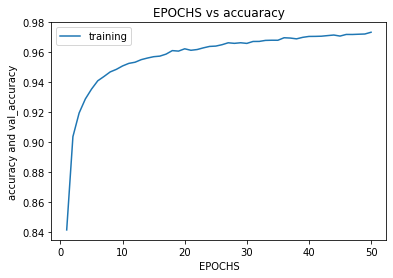

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [14]:
plt.subplot(1,1,1)
plt.plot(range(1,51),history.history['accuracy'])
plt.legend(("training"," validation"))
plt.ylabel("accuracy and val_accuracy")
plt.xlabel("EPOCHS")
plt.title("EPOCHS vs accuaracy")

# Test data (evaluating)

Test loss: 0.12147057056427002
Test accuracy: 0.9607208371162415


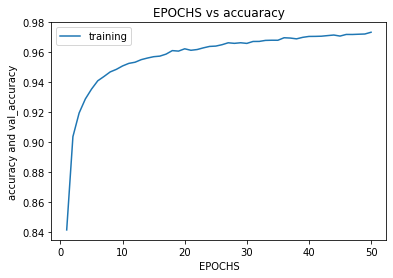

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Model Save

INFO:tensorflow:Assets written to: model/audio\assets


INFO:tensorflow:Assets written to: model/audio\assets


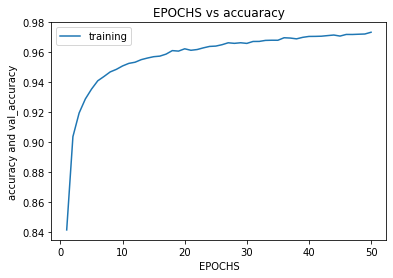

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [16]:
model_version="audio"
model.save(f"model/{model_version}")